# **<span style="color: #0098cd;">Algoritmos de búsqueda para planificación de rutas en paquetería</span>**

## **Objetivos**

## **Descripción**

## **Generador del mapa**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap 

def draw_map(game_map):
    """
    Dibuja un mapa de un juego utilizando una codificación de colores específica.

    Parameters:
    game_map (list of list of str): Matriz donde cada elemento es un carácter que representa un tipo de terreno
        en el juego. Los caracteres deben ser uno de los siguientes:
        '#' para muro, ' ' para espacio libre, 'T' para el punto de inicio, 'P' para el objetivo, '·' para camino.

    Returns:
    None: Esta función no devuelve ningún valor, pero muestra un mapa visual del juego utilizando matplotlib.

    Description:
    La función toma una matriz de caracteres y la convierte en un mapa numérico basado en un mapeo predefinido.
    Luego, utiliza matplotlib para dibujar este mapa con una paleta de colores personalizada y muestra una barra
    de color que indica la leyenda del mapa. El mapa es útil para visualizar diferentes secciones del juego, como
    muros, caminos y objetivos.
    """
    # Mapeo de caracteres a valores numericos
    color_map = {'#': 0, ' ': 1, 'T': 2, 'P': 3, '·': 4}
    
    # Creo un colormap personalizado a partir de una lista de colores
    colors = ['black', 'white', 'red', 'blue', 'green']
    cmap = ListedColormap(colors)
    
    # Convertir el mapa de caracteres a un mapa numérico usando el mapeo de colores
    numeric_map = np.array([[color_map[char] for char in row] for row in game_map])
    
    # Creo y muestro el gráfico
    plt.imshow(numeric_map, cmap=cmap)
    cbar = plt.colorbar(ticks=range(len(color_map)))
    cbar.ax.set_yticklabels(['Muro', 'Libre', 'Inicio', 'Objetivo', 'Camino'])
    plt.show()

In [3]:
#!pip install simpleai  # Instala la librería simpleai si no la tienes instalada
from __future__ import print_function
import math
from simpleai.search.viewers import BaseViewer,ConsoleViewer,WebViewer
from simpleai.search import SearchProblem, astar, breadth_first, depth_first, uniform_cost
# Búsqueda en amplitud (breadth-first search) y búsqueda en profundidad (depth-first search).
# astar es otro algoritmo de búsqueda, más conocido como A* (A estrella)

class GameWalkPuzzle(SearchProblem):

    def __init__(self, board, costs, heuristic_number):
        self.board = board
        self.goal = (0, 0)
        self.costs = costs
        self.heuristic_number = heuristic_number
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "t":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "p":
                    self.goal = (x, y)

        super(GameWalkPuzzle, self).__init__(initial_state=self.initial)

    def actions(self, state):
        actions = []
        for action in list(self.costs.keys()):
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state

    def is_goal(self, state):
        return state == self.goal

    def cost(self, state, action, state2):
        return self.costs[action]

    # Esta función heurística es la distancia entre el estado actual
    # el objetivo (único) identificado como self.goal
    def heuristic1(self, state):
        x, y = state
        gx, gy = self.goal
        return abs(x - gx) + abs(y - gy) # distancia de Manhattan

    def heuristic2(self, state):
        x, y = state
        gx, gy = self.goal
        return max(abs(x - gx),abs(y - gy)) # distancia de Chebychev

    def heuristic3(self, state):
        x, y = state
        gx, gy = self.goal
        return 2*(abs(x - gx) + abs(y - gy)) # distancia de Manhattan modificada
    
    def heuristic4(self, state):
        x, y = state
        gx, gy = self.goal
        return 4*(abs(x - gx) + abs(y - gy)) # distancia de Manhattan modificada

    def heuristic(self,state):
      if self.heuristic_number == 1:
          return self.heuristic1(state)
      elif self.heuristic_number == 2:
          return self.heuristic2(state)
      elif self.heuristic_number == 3:
          return self.heuristic3(state)
      elif self.heuristic_number == 4:
          return self.heuristic4(state)
      else:
        raise Exception("El número de la función heurística debe estar entre 1 y 4")

def searchInfo (problem,result,use_viewer):
    def getTotalCost (problem,result):
        originState = problem.initial_state
        totalCost = 0
        for action,endingState in result.path():
            if action is not None:
                totalCost += problem.cost(originState,action,endingState)
                originState = endingState
        return totalCost


    res = "Total length of solution: {0}\n".format(len(result.path()))
    res += "Total cost of solution: {0}\n".format(getTotalCost(problem,result))

    if use_viewer:
        stats = [{'name': stat.replace('_', ' '), 'value': value}
                         for stat, value in list(use_viewer.stats.items())]

        for s in stats:
            res+= '{0}: {1}\n'.format(s['name'],s['value'])
    return res



# Configuramos aqui la funcion resultado_experimento para graficar con nuestra funcion
def resultado_experimento(problem, MAP, result, used_viewer):
    path = [x[1] for x in result.path()]
    visual_map = [list(row) for row in MAP]  # Creo una copia del mapa para modificar

    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                visual_map[y][x] = 'T'  # Marca la posición inicial
            elif (x, y) == problem.goal:
                visual_map[y][x] = 'P'  # Marca la posición objetivo
            elif (x, y) in path:
                visual_map[y][x] = '·'  # Marca el camino recorrido

    draw_map(visual_map)  # Dibuja el mapa con Matplotlib

    info = searchInfo(problem, result, used_viewer)
    print(info)

def main(MAP_ASCII,COSTS,algorithms,heuristic_number=1):
    MAP = [list(x) for x in MAP_ASCII.split("\n") if x]
    
    for algorithm in algorithms:
      problem = GameWalkPuzzle(MAP,COSTS,heuristic_number)
      used_viewer=BaseViewer()
      # Mostramos los experimentos
      print ("Experimento con algoritmo {}:".format(algorithm))

      result = algorithm(problem, graph_search=True, viewer=used_viewer)
      resultado_experimento(problem,MAP,result,used_viewer)

## **Caso 1 - Búsqueda en Amplitud y Búsqueda en Profundidad**

Experimento con algoritmo <function breadth_first at 0x000001F9F460F060>:


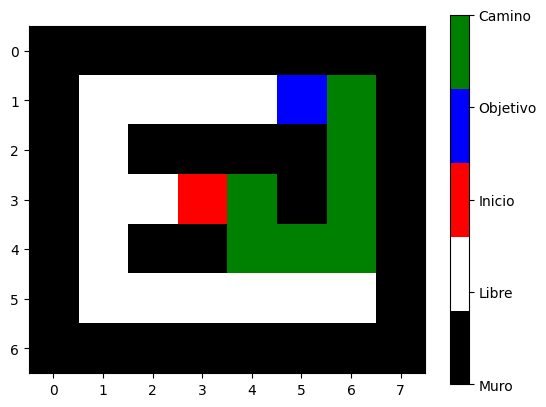

Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function depth_first at 0x000001F9F4670540>:


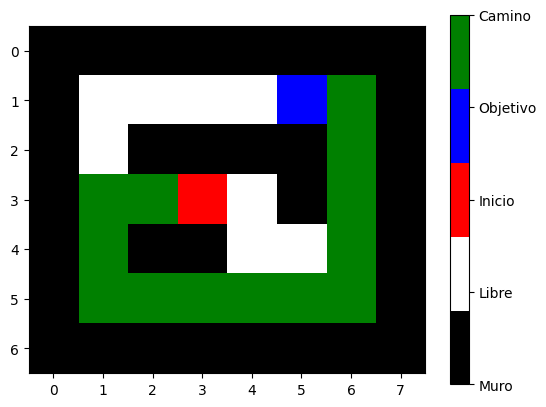

Total length of solution: 15
Total cost of solution: 14.0
max fringe size: 5
visited nodes: 15
iterations: 15



In [ ]:
# Se ejecutan los algoritmos de búsqueda en amplitud (Breadth-First Search) y búsqueda en profundidad (Depth-First Search).

# Mapa del juego
MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

# Costes de moverse en cada dirección
COSTS = { 
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(breadth_first,depth_first) # Algoritmos de búsqueda en amplitud y búsqueda en profundidad
main (MAP_ASCII,COSTS,algorithms)      # Se ejecuta la función main